          TESTIRANJE TABU SEARCH ALGORITMA

FUNKCIJA: Paraboloid: $f(x_1,x_2) = x_1^2 + x_2^2$
Početna tačka: [4, 4]
Parametri: delta_x=0.5, N=1000, eps=0.0, L=1000
----------------------------------------------------------------------
TS rezultat:
  x = [0.000000, 0.000000]
  f(x) = 0.0000000000

Globalni minimum:
  x = [0, 0]
  f(x) = 0.0000000000

Greška: 0.0000000000


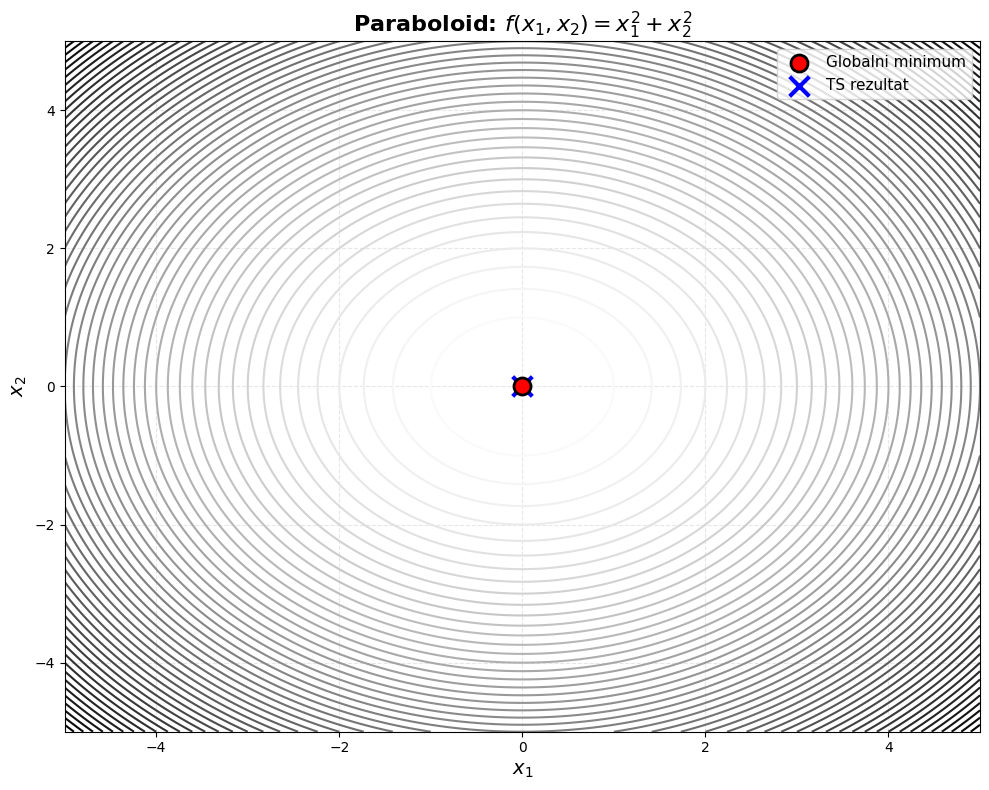


FUNKCIJA: Rastrigin
Početna tačka: [4, 4]
Parametri: delta_x=0.5, N=1000, eps=0.0, L=1000
----------------------------------------------------------------------
TS rezultat:
  x = [0.000000, 0.000000]
  f(x) = 0.0000000000

Globalni minimum:
  x = [0, 0]
  f(x) = 0.0000000000

Greška: 0.0000000000


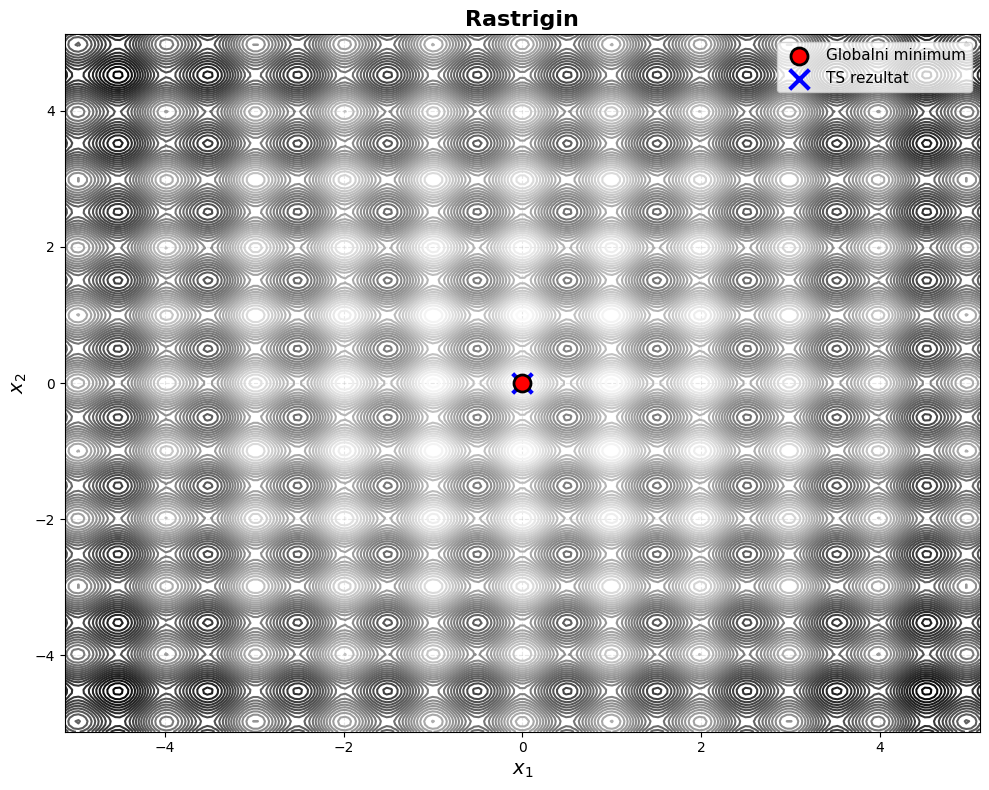


FUNKCIJA: Drop-Wave
Početna tačka: [3, 3]
Parametri: delta_x=0.5, N=1000, eps=0.0, L=1000
----------------------------------------------------------------------
TS rezultat:
  x = [0.000000, 0.000000]
  f(x) = -1.0000000000

Globalni minimum:
  x = [0, 0]
  f(x) = -1.0000000000

Greška: 0.0000000000


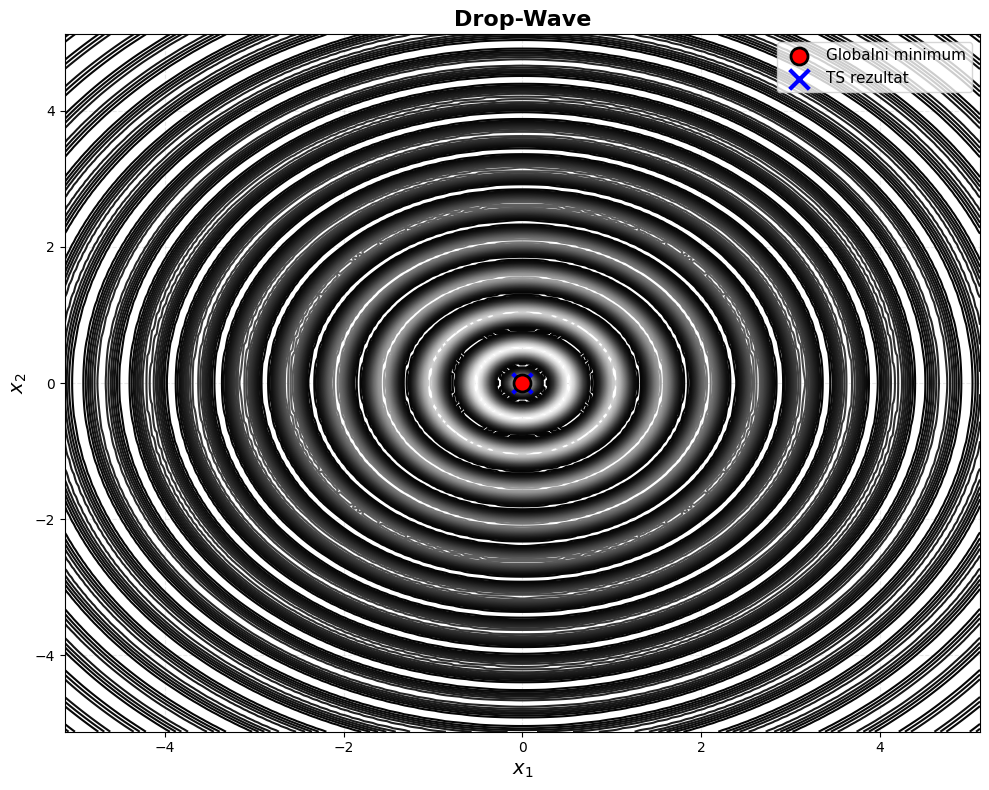


FUNKCIJA: Holder Table
Početna tačka: [5, 5]
Parametri: delta_x=0.5, N=1000, eps=0.0, L=1000
----------------------------------------------------------------------
TS rezultat:
  x = [5.000000, 9.500000]
  f(x) = -10.7233813200

Globalni minimum:
  Broj globalnih minimuma: 4
  f(x) = -19.2085025678

Greška: 8.4851212478


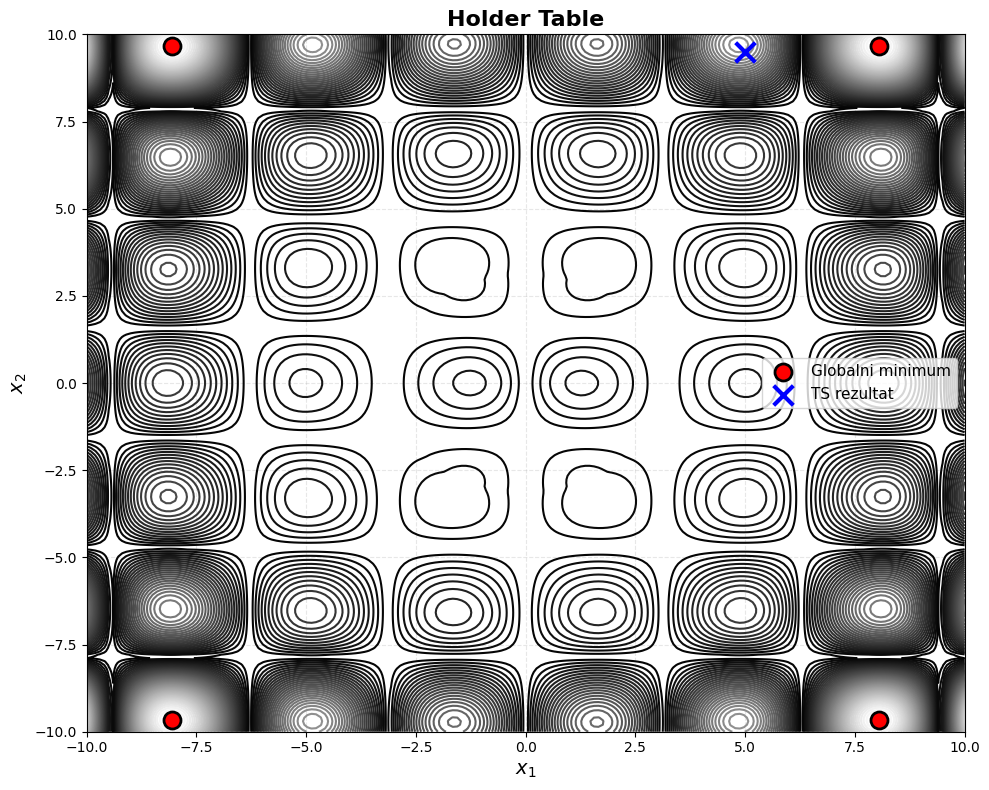


 ZAKLJUČCI:
Tabu Search algoritam koristi kratkotrajnu memoriju (tabu listu)
da bi izbjegao ciklično pretraživanje. Ključne prednosti:

1. PAMĆENJE: Tabu lista sprečava vraćanje na već posjećene tačke
2. DIVERZIFIKACIJA: Može ići 'uzbrdo' da izbjegne lokalne minimume
3. PERFORMANSE: Bolji od osnovnog LS na multimodalnim funkcijama

Parametar L (dužina liste) je važan:
  - Mali L: Brže, ali može ponavljati cikluse
  - Veliki L: Sporije, ali bolja diverzifikacija


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ===== TABU SEARCH IMPLEMENTACIJA =====

def TS(f, opseg, x0, delta_x, N, eps, L):
    """
    Tabu Search algoritam.

    Parametri:
    - L: dužina tabu liste (broj tačaka koje pamtimo)

    Ključne razlike od LS:
    1. Tabu lista T - pamti L prethodno posjećenih tačaka
    2. x_trenutno - tačka gdje trenutno jesmo (može biti lošija!)
    3. x_best - NAJBOLJA tačka dosad (globalno)
    """

    # INICIJALIZACIJA (linija 1 pseudokoda)
    x_trenutno = np.array(x0, dtype=float)  # Gdje trenutno jesmo
    x_best = x_trenutno.copy()               # Najbolja tačka dosad
    v_best = f(*x_best)                      # Najbolja vrijednost dosad

    T = []  # Tabu lista - PRAZNA na početku

    n_dim = len(opseg)

    # GLAVNA PETLJA (linija 2-16)
    for iteracija in range(N):

        # GENERIŠI OKOLINU BEZ TABU TAČAKA (linija 3)
        # N̄(x, δ) = N(x, δ) \ T
        pomjeranja = list(itertools.product([-1, 0, 1], repeat=n_dim))
        pomjeranja.remove(tuple([0]*n_dim))

        # Lista kandidata iz okoline (bez tabu tačaka)
        kandidati = []

        for pomjeranje in pomjeranja:
            x_novi = x_trenutno.copy()

            validan = True
            for dim in range(n_dim):
                x_novi[dim] += pomjeranje[dim] * delta_x

                # Provjeri granice
                if x_novi[dim] < opseg[dim][0] or x_novi[dim] > opseg[dim][1]:
                    validan = False
                    break

            if not validan:
                continue

            # PROVJERI DA LI JE TAČKA U TABU LISTI
            je_tabu = False
            for tabu_tacka in T:
                if np.allclose(x_novi, tabu_tacka, atol=delta_x/2):
                    je_tabu = True
                    break

            # Ako NIJE tabu, dodaj u kandidate
            if not je_tabu:
                v_novi = f(*x_novi)
                kandidati.append((x_novi, v_novi))

        # Ako nema kandidata (sve su tabu), PREKINI
        if len(kandidati) == 0:
            break

        # IZABERI NAJBOLJU TAČKU IZ KANDIDATA (linija 4-12)
        # VAŽNO: Ovo može biti LOŠIJA od x_trenutno, ali je najbolja u okolini!
        kandidati.sort(key=lambda k: k[1])  # Sortiraj po vrijednosti
        x_novi_najbolji, v_novi_najbolji = kandidati[0]

        # POMJERI SE NA TU TAČKU (čak i ako je lošija!)
        x_trenutno = x_novi_najbolji

        # AŽURIRAJ GLOBALNO NAJBOLJE RJEŠENJE (linija 14)
        if v_novi_najbolji < v_best:
            x_best = x_trenutno.copy()
            v_best = v_novi_najbolji

        # AŽURIRAJ TABU LISTU (linija 15)
        T.append(x_trenutno.copy())

        # Drži tabu listu na dužini L (FIFO - First In First Out)
        if len(T) > L:
            T.pop(0)  # Ukloni najstariju tačku

        # USLOV ZAUSTAVLJANJA (linija 16)
        # Ako je promjena manja od eps
        if iteracija > 0 and abs(v_novi_najbolji - v_best) < eps:
            # Ali nastavi malo duže jer možda treba da "prošeta" preko brda
            pass

    return x_best, v_best


# ===== TESTNE FUNKCIJE (ISTE KAO U LAB 3) =====

def paraboloid(x1, x2):
    return x1**2 + x2**2

def rastrigin(x1, x2):
    A = 10
    return A*2 + (x1**2 - A*np.cos(2*np.pi*x1)) + (x2**2 - A*np.cos(2*np.pi*x2))

def drop_wave(x1, x2):
    num = 1 + np.cos(12*np.sqrt(x1**2 + x2**2))
    den = 0.5*(x1**2 + x2**2) + 2
    return -num/den

def holder_table(x1, x2):
    return -np.abs(np.sin(x1)*np.cos(x2)*np.exp(np.abs(1 - np.sqrt(x1**2 + x2**2)/np.pi)))


# ===== FUNKCIJA ZA CRTANJE =====

def plot_rezultati_ts(f, opseg, naziv, globalni_min, x_ts):
    """Crta contour plot sa TS rezultatom."""
    x1 = np.linspace(opseg[0][0], opseg[0][1], 200)
    x2 = np.linspace(opseg[1][0], opseg[1][1], 200)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f(X1, X2)

    plt.figure(figsize=(10, 8))

    # Contour plot (crno-bijeli)
    plt.contour(X1, X2, Y, 50, cmap='binary')

    # Globalni minimum(i) - crveni kružić
    for idx, gm in enumerate(globalni_min):
        plt.scatter(gm[0], gm[1], color='red', marker='o',
                    s=150, label='Globalni minimum' if idx == 0 else '',
                    zorder=5, edgecolors='black', linewidths=2)

    # TS rezultat - plavi križić
    plt.scatter(x_ts[0], x_ts[1], color='blue', marker='x',
                s=200, label='TS rezultat', linewidths=3, zorder=4)

    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title(naziv, fontsize=16, fontweight='bold')
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()


# ===== TESTIRANJE =====

# Postavke algoritma
delta_x = 0.5
N = 1000
eps = 0.0
L = 1000  # Dužina tabu liste

# Lista funkcija za testiranje
testovi = [
    {
        'f': paraboloid,
        'opseg': [[-5, 5], [-5, 5]],
        'x0': [4, 4],
        'globalni_min': [[0, 0]],
        'naziv': 'Paraboloid: $f(x_1,x_2) = x_1^2 + x_2^2$'
    },
    {
        'f': rastrigin,
        'opseg': [[-5.12, 5.12], [-5.12, 5.12]],
        'x0': [4, 4],
        'globalni_min': [[0, 0]],
        'naziv': 'Rastrigin'
    },
    {
        'f': drop_wave,
        'opseg': [[-5.12, 5.12], [-5.12, 5.12]],
        'x0': [3, 3],
        'globalni_min': [[0, 0]],
        'naziv': 'Drop-Wave'
    },
    {
        'f': holder_table,
        'opseg': [[-10, 10], [-10, 10]],
        'x0': [5, 5],
        'globalni_min': [
            [8.05502, 9.66459],
            [8.05502, -9.66459],
            [-8.05502, 9.66459],
            [-8.05502, -9.66459]
        ],
        'naziv': 'Holder Table'
    }
]

# Pokreni testove
print("="*70)
print("          TESTIRANJE TABU SEARCH ALGORITMA")
print("="*70)

for test in testovi:
    print(f"\n{'='*70}")
    print(f"FUNKCIJA: {test['naziv']}")
    print(f"{'='*70}")
    print(f"Početna tačka: {test['x0']}")
    print(f"Parametri: delta_x={delta_x}, N={N}, eps={eps}, L={L}")
    print("-"*70)

    # TABU SEARCH
    x_ts, v_ts = TS(test['f'], test['opseg'], test['x0'], delta_x, N, eps, L)
    print(f"TS rezultat:")
    print(f"  x = [{x_ts[0]:.6f}, {x_ts[1]:.6f}]")
    print(f"  f(x) = {v_ts:.10f}")

    # Globalni minimum
    v_global = test['f'](*test['globalni_min'][0])
    print(f"\nGlobalni minimum:")
    if len(test['globalni_min']) == 1:
        print(f"  x = {test['globalni_min'][0]}")
    else:
        print(f"  Broj globalnih minimuma: {len(test['globalni_min'])}")
    print(f"  f(x) = {v_global:.10f}")

    # Greška
    greska_ts = abs(v_ts - v_global)
    print(f"\nGreška: {greska_ts:.10f}")

    # Crtaj
    plot_rezultati_ts(test['f'], test['opseg'], test['naziv'],
                      test['globalni_min'], x_ts)

print("\n" + "="*70)
print(" ZAKLJUČCI:")
print("="*70)
print("Tabu Search algoritam koristi kratkotrajnu memoriju (tabu listu)")
print("da bi izbjegao ciklično pretraživanje. Ključne prednosti:")
print("\n1. PAMĆENJE: Tabu lista sprečava vraćanje na već posjećene tačke")
print("2. DIVERZIFIKACIJA: Može ići 'uzbrdo' da izbjegne lokalne minimume")
print("3. PERFORMANSE: Bolji od osnovnog LS na multimodalnim funkcijama")
print("\nParametar L (dužina liste) je važan:")
print("  - Mali L: Brže, ali može ponavljati cikluse")
print("  - Veliki L: Sporije, ali bolja diverzifikacija")
print("="*70)